# Analysis

## Eddie and Kingsford. Using a combined effort, we created the below code to compare the total population of SSA countries from 02-17 to the total aid provided to these countries. We created a scatter plot to display the information. At the end, we ran a regression to see if there was any correlation between the population and the total amount of aid received.

## Our results showed that there was a weak correlation between total population and total aid received. Part of this was caused by Nigeria, which has the largest population, but did not receive the most aid. As a result, we don't believe that population has a direct correlation to the amount of aid provided by the US.

In [112]:
import pandas as pd
import numpy as np
import wbpy
import matplotlib.pyplot as plt

In [113]:
#Create two files that will be imported
Aid = "Economic_vs_Military.xlsx"
Pop = "SSA_Excel.xlsx"

Pop_df = pd.read_excel(Pop)
Aid_1_df = pd.read_excel(Aid)

#show Aid data
Aid_1_df.head()

,Row Labels,Year,Economic,Military,Grand Total
0,Angola,2002,1.659227e+08,0.000000,1.659227e+08
1,Angola,2003,2.155944e+08,395057.529807,2.159894e+08
2,Angola,2004,1.520490e+08,638258.217553,1.526873e+08
3,Angola,2005,8.311513e+07,387385.061877,8.350252e+07
4,Angola,2006,9.623060e+07,768343.338990,9.699894e+07


In [114]:
#rename Row Labels column into Country
Aid_1_df = Aid_1_df.rename(columns={"Row Labels": "Country"})
Aid_1_df.head(10)

,Country,Year,Economic,Military,Grand Total
0,Angola,2002,1.659227e+08,0.000000,1.659227e+08
1,Angola,2003,2.155944e+08,395057.529807,2.159894e+08
2,Angola,2004,1.520490e+08,638258.217553,1.526873e+08
3,Angola,2005,8.311513e+07,387385.061877,8.350252e+07
4,Angola,2006,9.623060e+07,768343.338990,9.699894e+07
5,Angola,2007,6.191552e+07,512302.664188,6.242783e+07
6,Angola,2008,6.537215e+07,396706.828528,6.576886e+07
7,Angola,2009,6.095525e+07,535667.400000,6.149092e+07
8,Angola,2010,1.114652e+08,417850.218081,1.118831e+08
9,Angola,2011,8.945588e+07,458935.004372,8.991482e+07


In [115]:
#check that all countries are there
Aid_1_df['Country'].value_counts()

Rwanda          16
Somalia         16
Senegal         16
Ghana           16
Mali            16
Burundi         16
Zimbabwe        16
Uganda          16
Nigeria         16
Sierra Leone    16
South Africa    16
Namibia         16
Mozambique      16
Kenya           16
Madagascar      16
Angola          16
Benin           16
Ethiopia        16
Name: Country, dtype: int64

In [116]:
#show Stability data
Pop_df.head()

,Country,Year,Population
0,Angola,2002,17519417
1,Angola,2003,18121479
2,Angola,2004,18758145
3,Angola,2005,19433602
4,Angola,2006,20149901


In [117]:
#show the table
Pop_df.set_index('Year', drop=True)
Pop_df.head(16)

,Country,Year,Population
0,Angola,2002,17519417
1,Angola,2003,18121479
2,Angola,2004,18758145
3,Angola,2005,19433602
4,Angola,2006,20149901
5,Angola,2007,20905363
6,Angola,2008,21695634
7,Angola,2009,22514281
8,Angola,2010,23356246
9,Angola,2011,24220661


In [118]:
#merge Aid and Population tables using the variable Country and Year
Combined_df_1 = pd.merge(Aid_1_df, Pop_df, on=['Country', 'Year'])

In [119]:
# Rename Grand Total for Total Aid
Combined = Combined_df_1.rename(index=str, columns={"Grand Total": "Total Aid"})
Combined.head(10)

,Country,Year,Economic,Military,Total Aid,Population
0,Angola,2002,1.659227e+08,0.000000,1.659227e+08,17519417
1,Angola,2003,2.155944e+08,395057.529807,2.159894e+08,18121479
2,Angola,2004,1.520490e+08,638258.217553,1.526873e+08,18758145
3,Angola,2005,8.311513e+07,387385.061877,8.350252e+07,19433602
4,Angola,2006,9.623060e+07,768343.338990,9.699894e+07,20149901
5,Angola,2007,6.191552e+07,512302.664188,6.242783e+07,20905363
6,Angola,2008,6.537215e+07,396706.828528,6.576886e+07,21695634
7,Angola,2009,6.095525e+07,535667.400000,6.149092e+07,22514281
8,Angola,2010,1.114652e+08,417850.218081,1.118831e+08,23356246
9,Angola,2011,8.945588e+07,458935.004372,8.991482e+07,24220661


In [120]:
#Groupby Country
Angola = Combined[(Combined["Country"] =="Angola")].groupby([Combined['Country']])
Benin = Combined[(Combined["Country"] =="Benin")].groupby([Combined['Country']])
Burundi = Combined[(Combined["Country"] =="Burundi")].groupby([Combined['Country']])
Ethiopia = Combined[(Combined["Country"] =="Ethiopia")].groupby([Combined['Country']])
Ghana = Combined[(Combined["Country"] =="Ghana")].groupby([Combined['Country']])
Kenya = Combined[(Combined["Country"] =="Kenya")].groupby([Combined['Country']])
Madagascar = Combined[(Combined["Country"] =="Madagascar")].groupby([Combined['Country']])
Mali = Combined[(Combined["Country"] =="Mali")].groupby([Combined['Country']])
Mozambique = Combined[(Combined["Country"] =="Mozambique")].groupby([Combined['Country']])
Namibia = Combined[(Combined["Country"] =="Namibia")].groupby([Combined['Country']])
Nigeria = Combined[(Combined["Country"] =="Nigeria")].groupby([Combined['Country']])
Rwanda = Combined[(Combined["Country"] =="Rwanda")].groupby([Combined['Country']])
Senegal = Combined[(Combined["Country"] =="Senegal")].groupby([Combined['Country']])
Sierra = Combined[(Combined["Country"] =="Sierra Leone")].groupby([Combined['Country']])
Somalia = Combined[(Combined["Country"] =="Somalia")].groupby([Combined['Country']])
SA = Combined[(Combined["Country"] =="South Africa")].groupby([Combined['Country']])
Uganda = Combined[(Combined["Country"] =="Uganda")].groupby([Combined['Country']])
Zimbabwe = Combined[(Combined["Country"] =="Zimbabwe")].groupby([Combined['Country']])

In [121]:
#Create sum of population and total aid from 02 - 17
Angola_pop = Angola["Population"].sum()
Angola_aid = Angola["Total Aid"].sum()
Benin_pop = Benin["Population"].sum()
Benin_aid = Benin["Total Aid"].sum()
Burundi_pop = Burundi["Population"].sum()
Burundi_aid = Burundi["Total Aid"].sum()
Ethiopia_pop = Ethiopia["Population"].sum()
Ethiopia_aid = Ethiopia["Total Aid"].sum()
Ghana_pop = Ghana["Population"].sum()
Ghana_aid = Ghana["Total Aid"].sum()
Kenya_pop = Kenya["Population"].sum()
Kenya_aid = Kenya["Total Aid"].sum()
Madagascar_pop = Madagascar["Population"].sum()
Madagascar_aid = Madagascar["Total Aid"].sum()
Mali_pop = Mali["Population"].sum()
Mali_aid = Mali["Total Aid"].sum()
Mozambique_pop = Mozambique["Population"].sum()
Mozambique_aid = Mozambique["Total Aid"].sum()
Namibia_pop = Namibia["Population"].sum()
Namibia_aid = Namibia["Total Aid"].sum()
Nigeria_pop = Nigeria["Population"].sum()
Nigeria_aid = Nigeria["Total Aid"].sum()
Rwanda_pop = Rwanda["Population"].sum()
Rwanda_aid = Rwanda["Total Aid"].sum()
Senegal_pop = Senegal["Population"].sum()
Senegal_aid = Senegal["Total Aid"].sum()
Sierra_pop = Sierra["Population"].sum()
Sierra_aid = Sierra["Total Aid"].sum()
Somalia_pop = Somalia["Population"].sum()
Somalia_aid = Somalia["Total Aid"].sum()
SA_pop = SA["Population"].sum()
SA_aid = SA["Total Aid"].sum()
Uganda_pop = Uganda["Population"].sum()
Uganda_aid = Uganda["Total Aid"].sum()
Zimbabwe_pop = Zimbabwe["Population"].sum()
Zimbabwe_aid = Zimbabwe["Total Aid"].sum()


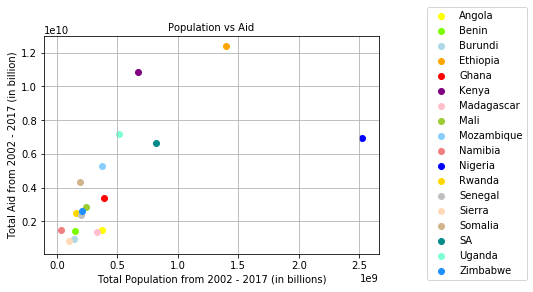

In [122]:
#Create Scatter plot
plt.scatter(Angola_pop, Angola_aid, label = "Angola", color=["yellow"], alpha=1, marker='o')
plt.scatter(Benin_pop, Benin_aid, label = "Benin", color=["lawngreen"], alpha=1, marker='o')
plt.scatter(Burundi_pop, Burundi_aid, label = "Burundi", color=["lightblue"], alpha=1, marker='o')
plt.scatter(Ethiopia_pop, Ethiopia_aid, label = "Ethiopia", color=["orange"], alpha=1, marker='o')
plt.scatter(Ghana_pop, Ghana_aid, label = "Ghana", color=["red"], alpha=1, marker='o')
plt.scatter(Kenya_pop, Kenya_aid, label = "Kenya", color=["purple"], alpha=1, marker='o')
plt.scatter(Madagascar_pop, Madagascar_aid, label = "Madagascar", color=["pink"], alpha=1, marker='o')
plt.scatter(Mali_pop, Mali_aid, label = "Mali", color=["yellowgreen"], alpha=1, marker='o')
plt.scatter(Mozambique_pop, Mozambique_aid, label = "Mozambique", color=["lightskyblue"], alpha=1, marker='o')
plt.scatter(Namibia_pop, Namibia_aid, label = "Namibia", color=["lightcoral"], alpha=1, marker='o')
plt.scatter(Nigeria_pop, Nigeria_aid, label = "Nigeria", color=["blue"], alpha=1, marker='o')
plt.scatter(Rwanda_pop, Rwanda_aid, label = "Rwanda", color=["gold"], alpha=1, marker='o')
plt.scatter(Senegal_pop, Senegal_aid, label = "Senegal", color=["silver"], alpha=1, marker='o')
plt.scatter(Sierra_pop, Sierra_aid, label = "Sierra", color=["peachpuff"], alpha=1, marker='o')
plt.scatter(Somalia_pop, Somalia_aid, label = "Somalia", color=["tan"], alpha=1, marker='o')
plt.scatter(SA_pop, SA_aid, label = "SA", color=["darkcyan"], alpha=1, marker='o')
plt.scatter(Uganda_pop, Uganda_aid, label = "Uganda", color=["aquamarine"], alpha=1, marker='o')
plt.scatter(Zimbabwe_pop, Zimbabwe_aid, label = "Zimbabwe", color=["dodgerblue"], alpha=1, marker='o')

#Graph Properties
x = np.arange(0.0, 50.0, 2.0)
y = x ** 1.3 + np.random.rand(*x.shape) * 30.0
s = np.random.rand(*x.shape) * 800 + 500

plt.xlabel("Total Population from 2002 - 2017 (in billions)", fontsize = 10)
plt.ylabel("Total Aid from 2002 - 2017 (in billion)", fontsize = 10)
plt.title("Population vs Aid", fontsize = 10)
#plt.axis([0, 3, 0, 2])
plt.grid()

# Create a legend
legend = plt.legend(fontsize = 5, scatterpoints=1, frameon=True, title = "Country", labelspacing=1, loc="best")

plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)


In [ ]:
plt.savefig("Images/Total Aid Vs Total Population")

In [123]:
from sklearn import linear_model
Pop_regression = Combined['Population']
Aid_regression = Combined['Total Aid']

# with statsmodels
X = sm.add_constant(Pop_regression) # adding a constant 
model = sm.OLS(Aid_regression, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              Total Aid   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     121.8
Date:                Thu, 18 Jul 2019   Prob (F-statistic):           7.79e-24
Time:                        20:56:09   Log-Likelihood:                -5943.1
No. Observations:                 288   AIC:                         1.189e+04
Df Residuals:                     286   BIC:                         1.190e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.398e+08    1.7e+07      8.225      0.0